## Illustration 1, Lecture 9: Approximating a curve with a Taylor series. 

In this exercise, we want to use a Maclaurin series to approximate a curve.  We'll first identify why we might want to approximate a curve and develop reasonable guesses for linear (first-order) and second-order approximations for gravitational potential above the surface of the Earth.  In board work afterwards, we'll show that those guesses are indeed correct.

In [2]:
# first, let's import some functions (aka software) we'll need
from numpy import arange, cos, sin, power
import numpy as np
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
print('We have imported some useful functions.')

# Run the code in this cell now. Click to place your cursor in this box and then press the run button above.  
# You should see printed below the line 'We have imported some useful functions', and 
# the number after "in" on the left of this cell should change

We have imported some useful functions.


<br><br>
First, let's define the curve we want to approximate: the gravitational potential of a satellite with mass $m$ at various distances above the surface of the Earth.  The gravitational potential at a distance $x$ from the centre of the Earth is
$$V(x) = \frac{GMm}{x}$$
where $G$ is the gravitational constant and $M$ is the mass of the Earth.  We'll assume that the satellite has a mass $m$ of 100 kg.

<br><br><br>

To plot this potential for a range of distances, place your cursor in the cell below and click run or press Shift+Enter. 

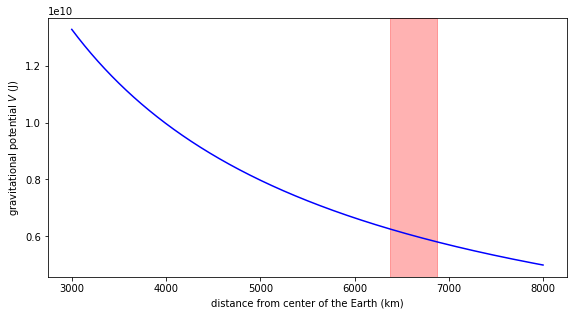

In [3]:
# make a list of distances from the centre of the Earth in km
# this list includes [3000,3001,3002,....,7997,7998,7999]
x=arange(3000,8000,1)

# gravitational constant, in m^3 / kg / s^2
G=6.67408e-11

# mass of the Earth, in kg
M = 5.972e24

# mass of satellite, in kg
m = 100

# gravitational potential: G*M*m/x
V = np.divide(G*M*m,x*1000)

# plot the values from the original curve
%matplotlib inline
plt.ion()
plt.figure(figsize=(8,4))
plt.axes([0.05,0.05,0.9,0.9])
plt.plot(x,V,color='blue',label='original')
plt.ylabel('gravitational potential $V$ (J)');
plt.xlabel('distance from center of the Earth (km)');
plt.axvspan(6371,6871,alpha=0.3,color='r');

But let's imagine that the satellite is always located in a small range of distances: within a region 500 km above the surface of the Earth, in the shaded region above.  Maybe we can approximate the potential as a straight line.

Q1: Why might we want to approximate this gravitational potential curve, or a more complicated function, as a straight line?

<br><br><br>

We're going to approximate the curve in the 500 km above the surface of the Earth with the form
$$V(x) \approx V_0 + V_1 (x-R) $$
where $R$ is the Earth's radius.

This approximation might be a good idea because we're good at measuring things on the surface of the Earth.  On the surface of the Earth, $x=R$, and the second term in the approximation above is zero.  So $V_0$ should be the gravitational potential on the surface of the Earth.  

We'll calculate $V_0$ in the cell, below, as
$$V_0 = V(R) = \frac{GMm}{R}$$

In [48]:
R = 6371
V0 = G*M*m/(R*1000)

print('The value of V0 is')
print(V0)

The value of V0 is
6256098847.904569


Q2: What should $V_1$ be?  Should $V_1$ be positive or negative?  How would you describe $V_1$ graphically?  How would you compute $V_1$ from $V(x)$ using a calculus expression?

<br>

Answer:
<!-- $V_1$ is the slope of the curve above.

It should be negative.

$$V_1=\frac{dV}{dx}(x)$$ evaluated at $x=R$ !-->


<!--So then we can go ahead and calculate $V_1$.

$$V_1 = \frac{dV}{dx}(x=R) = (-1)*\frac{GMm}{R^2}$$ !-->


In [51]:
# and let's calculate m then
V1 = -G*M*m/(R*1000)**2
print('The slope is')
print(V1)

The slope is
-981.9649737724955


So our approximation now looks like, in SI units to result in Joules,

$$V(x) \approx V_0 + V_1(x-R)$$
<br>
$$V(x) \approx 6.2\times 10^9 - 9.8 \times 10^2(x-6.4\times 10^6) $$

Let's go ahead and plot this approximation along with the full curve.

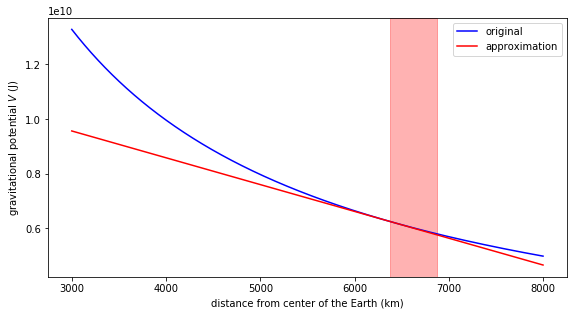

In [52]:
# plot the values from the original curve
%matplotlib inline
plt.ion()
plt.figure(figsize=(8,4))
plt.axes([0.05,0.05,0.9,0.9])
plt.plot(x,V,color='blue',label='original')
plt.ylabel('gravitational potential $V$ (J)');
plt.xlabel('distance from center of the Earth (km)');
plt.axvspan(6371,6871,alpha=0.3,color='r');

# add the values from our approximation
Vapp = V0+V1*(x*1000-R*1000)
plt.plot(x,Vapp,color='red',label='approximation');

plt.legend();

That approximation seems reasonable in the distance range we're interested in, but maybe it's not that precise.  Let's zoom in and see how accurate it is.

Running the cell below will make the same plot but change the distance range and y-axis limits.]

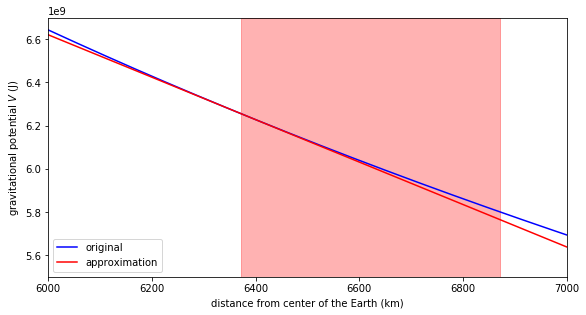

In [65]:
# plot the values from the original curve
%matplotlib inline
plt.ion()
plt.figure(figsize=(8,4))
plt.axes([0.05,0.05,0.9,0.9])
plt.plot(x,V,color='blue',label='original')
plt.ylabel('gravitational potential $V$ (J)');
plt.xlabel('distance from center of the Earth (km)');
plt.axvspan(6371,6871,alpha=0.3,color='r');

# add the values from our approximation
Vapp = V0+V1*(x*1000-R*1000)
plt.plot(x,Vapp,color='red',label='approximation');

plt.legend();
plt.xlim([6000,7000]);
plt.ylim([0.55e10,0.67e10]);

This more precise comparison suggests that the true potential curve $V(x)$ is not quite a straight line.  Let's say we  try a slightly more complex approximation: 

$$V(x) \approx V_0 + V_1 (x-R) + V_2 (x-R)^2$$

Q3: Should $V_2$ be positive or negative?  Is the original potential curve concave up or concave down?  What might be a good guess for the calculus-based expression of $V_2$?

<br><br>

<!-- The curve is concave up, so $V_2$ should be positive.  The plot of $y=x^2$ looks like a cup that opens upward, and a scaled, shifted version of that curve will be similar. !-->

<!--
The concavity of a curve is often quantified by its second derivative, by $\frac{d^2V}{dx^2}$, so $\frac{d^2V}{dx^2}$ evaluated at $x=R$ is a good guess for the $V_2$.  As we'll see in a few minutes, actual best value of $V_2$ is a factor of two different. It is

$$V_2 = \frac{1}{2}\frac{d^2V}{dx^2}$$
!-->

So let's go ahead and calculate $V_2$.

$$V_2 = \frac{1}{2}\frac{d^2V}{dx^2}(x=R) = \frac{1}{2}2\frac{GMm}{R^3} = \frac{GMm}{R^3} $$

In [62]:
V2 = G*M*m/(R*1000)**3
print('The value of V2 is')
print(V2)

The value of V2 is
0.0001541304306659073


And our approximation is now, again in SI units

$$V(x) \approx V_0 + V_1(x-R) + V_2(x-R)^2$$
<br>
$$V(x) \approx 6.2\times 10^9 - 9.8 \times 10^2(x-6.4\times 10^6) + 1.5\times 10^{-4} (x-R)^2$$

And we can plot this second-order approximation.

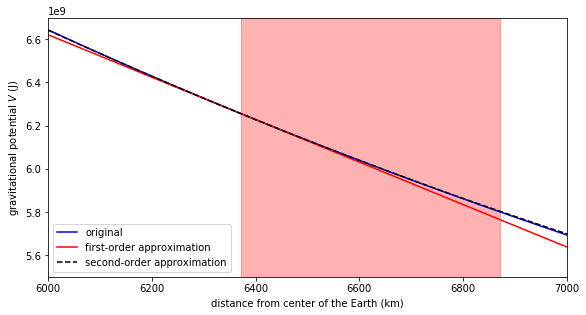

In [67]:
# plot the values from the original curve
%matplotlib inline
plt.ion()
plt.figure(figsize=(8,4))
plt.axes([0.05,0.05,0.9,0.9])
plt.plot(x,V,color='blue',label='original')
plt.ylabel('gravitational potential $V$ (J)');
plt.xlabel('distance from center of the Earth (km)');
plt.axvspan(6371,6871,alpha=0.3,color='r');

# add the values from our first-order approximation
Vapp1 = V0+V1*(x*1000-R*1000)
plt.plot(x,Vapp1,color='red',label='first-order approximation');

# add the values from our first-order approximation
Vapp2 = V0+V1*(x*1000-R*1000)+V2*power(x*1000-R*1000,2)
plt.plot(x,Vapp2,color='black',linestyle='--',label='second-order approximation');

plt.legend();
plt.xlim([6000,7000]);
plt.ylim([0.55e10,0.67e10]);

This approximation seems quite accurate for the distance range we're interested in.